# Part II - Exploring the Airline On-Time Performance Dataset (1996)
## by Tobiloba Babajide

## Investigation Overview

For this investigation, I was intersted in figuring the relationship between the elapsed time, distance traveled and if there is any delay in arrival or departure. The following are my findings:

## Dataset Overview

This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays in the year 1996. This database contains scheduled and actual departure and arrival times reported by certified United States air carriers that account for at least 1% of domestic scheduled passenger revenues. The data is collected by the Bureau of Transportation Statistics' Office of Airline Information (BTS).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
flight = pd.read_csv(r'C:\Users\USER\Desktop\Data Analysis Career\ALX Nanodegree Program\Project\Data Visualization project\1996.csv')

In [3]:
# drop rows with missing values
flight = flight.fillna(0)
flight.drop(flight[flight['ArrTime'] == 0].index, inplace = True)
flight.drop(flight[flight['DepTime'] == 0].index, inplace = True)

In [4]:
# convert ArrTime and DepTime to integers
flight['ArrTime'] = flight['ArrTime'].astype(int)
flight['DepTime'] = flight['DepTime'].astype(int)

In [5]:
# drop unnecessary columns
flight.drop(labels = ['CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1, inplace=True)

In [6]:
flight.drop_duplicates()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1996,1,29,1,2039,1930,2245,2139,DL,345,...,230.0,66.0,69.0,ATL,PHX,1587,6,10,0,0
1,1996,1,30,2,1931,1930,2142,2139,DL,345,...,224.0,3.0,1.0,ATL,PHX,1587,5,22,0,0
2,1996,1,31,3,1956,1930,2231,2139,DL,345,...,241.0,52.0,26.0,ATL,PHX,1587,7,27,0,0
3,1996,1,1,1,1730,1550,1909,1745,DL,411,...,201.0,84.0,100.0,ATL,PHX,1587,4,14,0,0
4,1996,1,2,2,1714,1550,1841,1745,DL,411,...,195.0,56.0,84.0,ATL,PHX,1587,4,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351978,1996,12,6,5,1512,0,1624,0,AA,1885,...,106.0,-12.0,-2.0,ATL,DFW,732,12,14,0,0
5351979,1996,12,7,6,1514,0,1633,0,AA,1885,...,115.0,-3.0,0.0,ATL,DFW,732,11,13,0,0
5351980,1996,12,8,7,1510,0,1650,0,AA,1885,...,129.0,14.0,-4.0,ATL,DFW,732,10,21,0,0
5351981,1996,12,9,1,1513,0,1616,0,AA,1885,...,105.0,-20.0,-1.0,ATL,DFW,732,9,9,0,0


There is a fairly uniform distribution for the number of flights taken in each month of the year 1996 with no month having exceptionally high nor low total values. There is also a fairly uniform distribution for the number of flights for each day of the week in the year 1996 with the first two days of the week having the highest and the last two days of the week having the lowest.

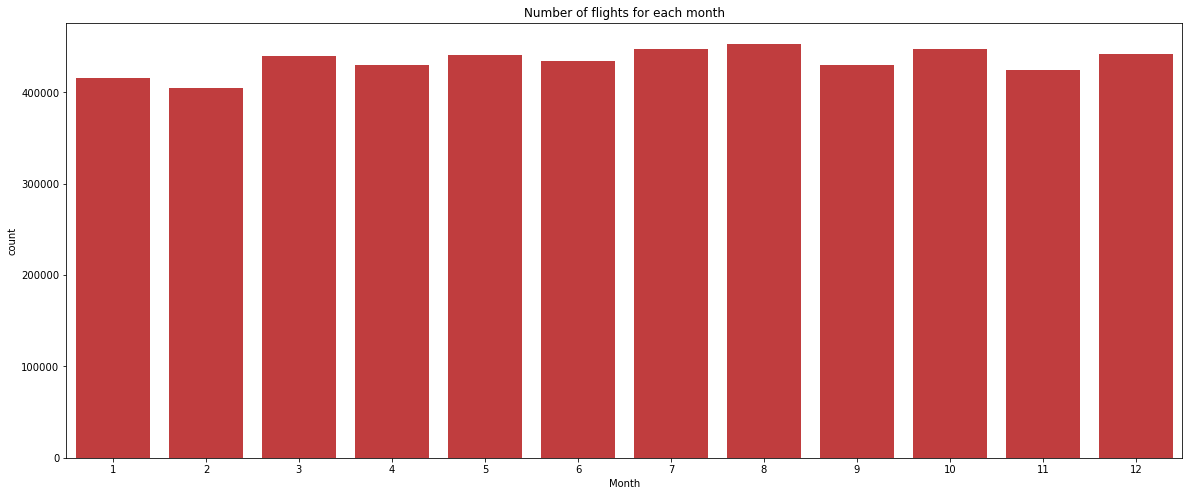

In [7]:
# set color palettes
color1 = sb.color_palette()[0]
color2 = sb.color_palette()[3]

# bar chart for count of months
plt.figure(figsize = [20,8])
sb.countplot(data = flight, x = 'Month', color = color2);
plt.xlabel('Month')
plt.title('Number of flights for each month')
plt.show()

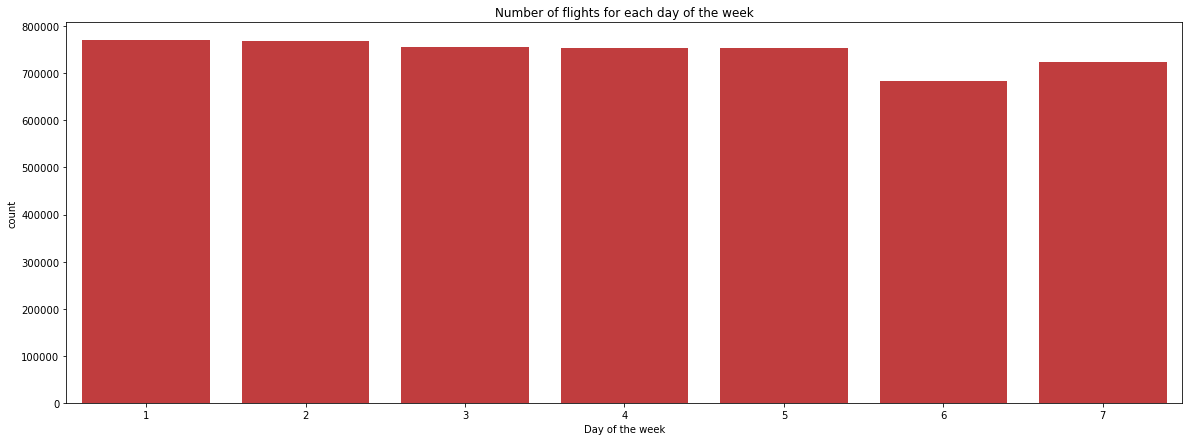

In [8]:
# bar chart for count of days of the week
plt.figure(figsize = [20,7])
sb.countplot(data = flight, x = 'DayOfWeek', color = color2);
plt.xlabel('Day of the week')
plt.title('Number of flights for each day of the week')
plt.show()

At very early times of the day, there are much fewer flight departures compared to other times of the day from 0600 to 2400.

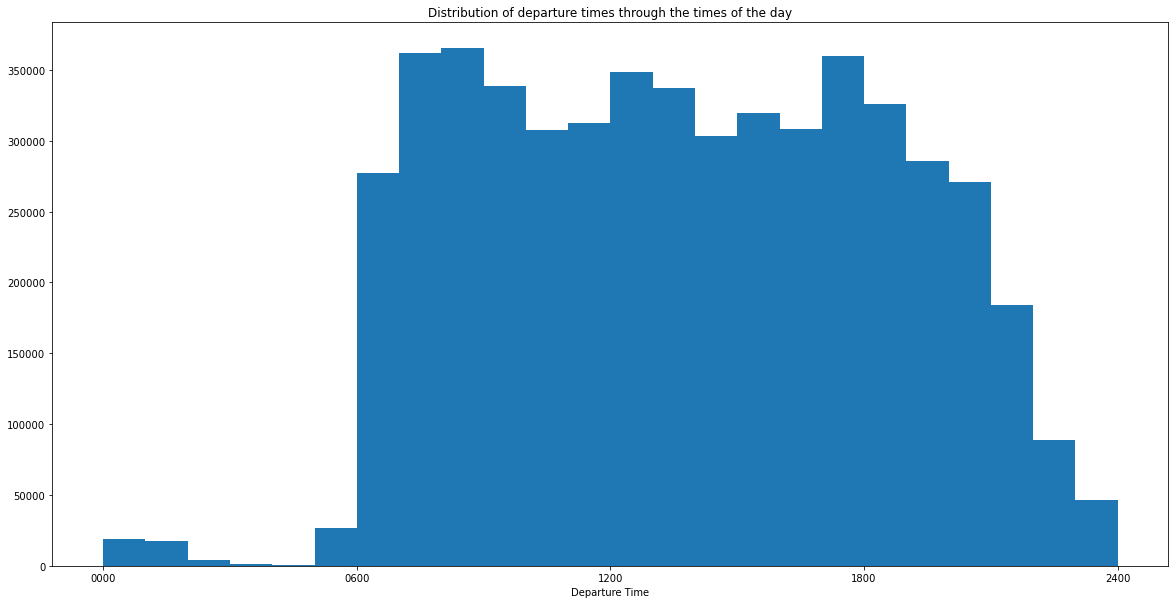

In [9]:
plt.figure(figsize = [20,10])
ticks = [0, 600, 1200, 1800,2400]
labels = ['0000', '0600', '1200', '1800', '2400']
bins = np.arange(0,flight.DepTime.max() + 100, 100)
plt.xticks(ticks,labels)
plt.hist(data = flight, x ='DepTime', color = color1, bins = bins);
plt.xlabel('Departure Time')
plt.title('Distribution of departure times through the times of the day')
plt.show()

As expected, there is a positive relationship between the distance traveled and the elapsed time.

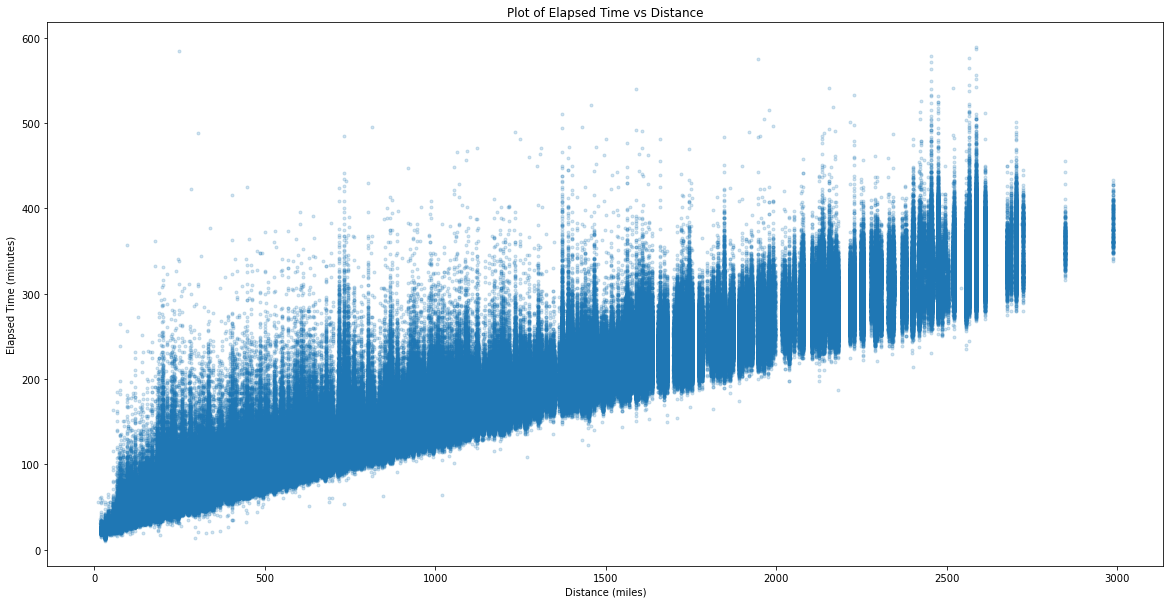

In [10]:
# set the necessary limit
flight1 = flight[flight['ActualElapsedTime'] >= 0]
flight1 = flight1[flight1['ActualElapsedTime'] <=600]
flight1 = flight1[flight1['Distance']<=3000]

# Plot scattterplot for actualelapsedtime and distance
plt.figure(figsize=[20,10])
plt.scatter(data = flight1, x = 'Distance', y = 'ActualElapsedTime', alpha = 0.2, marker = '.');
plt.xlabel('Distance (miles)')
plt.ylabel('Elapsed Time (minutes)')
plt.title('Plot of Elapsed Time vs Distance')
plt.show()

There is a very positive relationship between the departure delay and arrival delay with the majority of the delay falling below 400 minute.

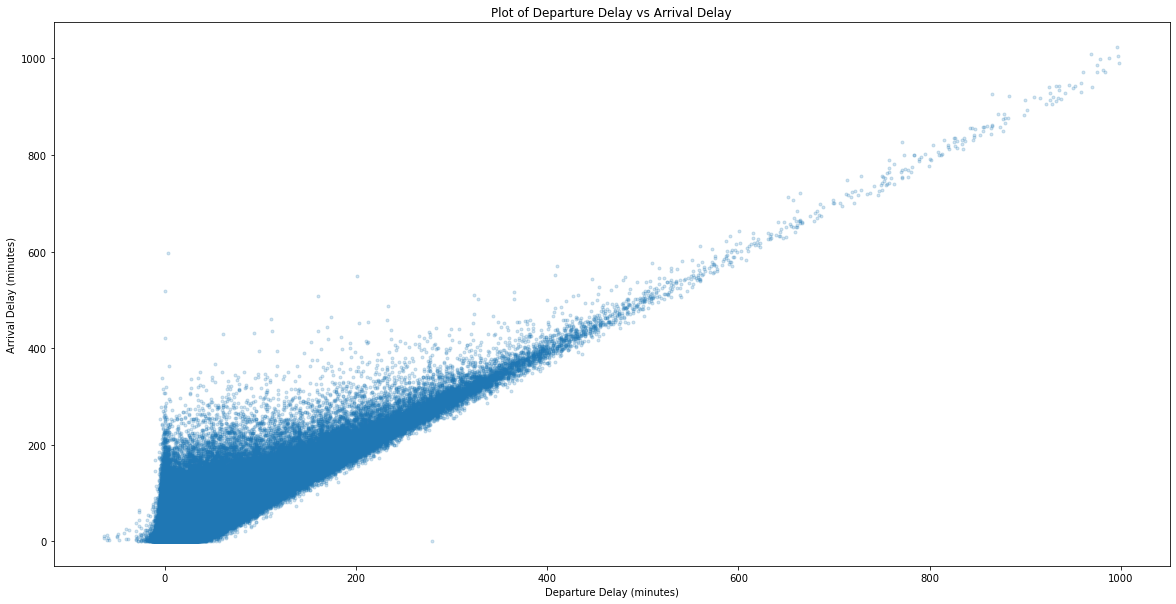

In [11]:
# set the limit
flight1 = flight[flight['ArrDelay'] >= 0]
flight1 = flight1[flight1['DepDelay'] <= 1000]

# plot the scatter plot
plt.figure(figsize = [20, 10])
plt.scatter(data = flight1, x = 'DepDelay', y = 'ArrDelay', alpha = 0.2, marker = '.')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Plot of Departure Delay vs Arrival Delay')
plt.show()

The departure delay has a median of approximately 6 minutes for most days of the week and the arrival delay has a median of approximately 10 minutes for most days of the week.

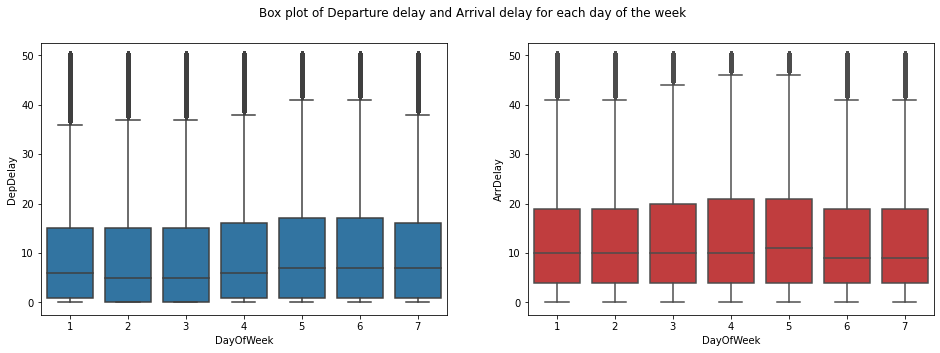

In [12]:
# set the limits
flight2 = flight[flight['DepDelay']<=50]
flight2 = flight2[flight2['DepDelay']>=0]
flight2 = flight2[flight2['ArrDelay']<=50]
flight2 = flight2[flight2['ArrDelay']>=0]

# plot size
fig = plt.figure(figsize=[16,5])

# subplot 1 for DepTime
plt.subplot(1, 2, 1)
sb.boxplot(data = flight2, x = 'DayOfWeek', y = 'DepDelay', color = color1)

# subplot 2 for ArrTime
plt.subplot(1, 2, 2)
sb.boxplot(data = flight2, x = 'DayOfWeek', y = 'ArrDelay', color = color2)

fig.suptitle('Box plot of Departure delay and Arrival delay for each day of the week')
plt.show()

There is a positive relationship between the distance traveled and the elapsed time. However, we see that a few of the carriers do not travel to far distances (WN and AS for example) like the others.

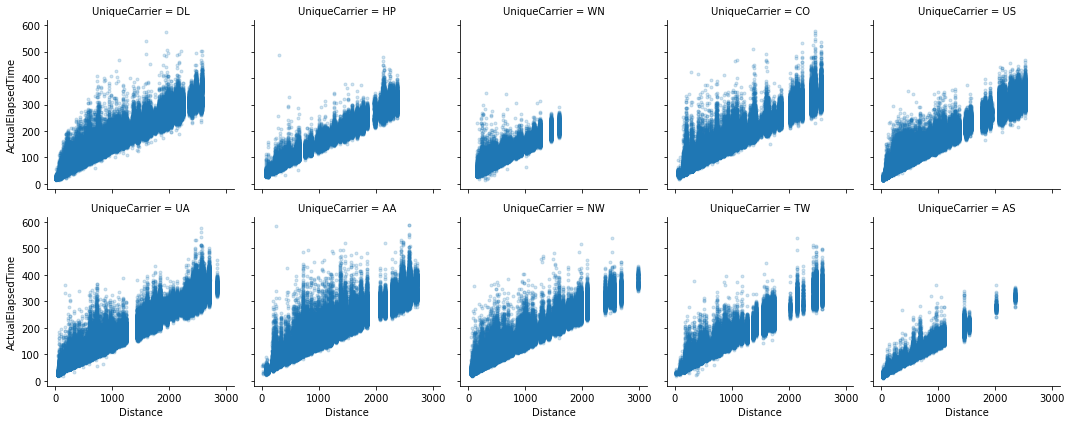

In [13]:
# set the limit
flight6 = flight[flight['ActualElapsedTime'] >= 0]
flight6 = flight6[flight6['ActualElapsedTime'] <= 600]
flight6 = flight6[flight6['Distance'] <= 3000]

# plot the grid
g = sb.FacetGrid(data = flight6, col = 'UniqueCarrier', col_wrap = 5, margin_titles = True)
g.map(plt.scatter, 'Distance', 'ActualElapsedTime', alpha = 0.2, marker = '.')

# Thank you for viewing!

In [17]:
# convert to slide
!jupyter nbconvert Viz_project_2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Viz_project_2.ipynb to slides
[NbConvertApp] Writing 1186719 bytes to Viz_project_2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\USER\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\USER\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line